In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline 
tqdm.pandas()
color = sns.color_palette()

%matplotlib inline

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import psutil

/home/sandhya/Project/final/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [2]:
#!pip install plotly

In [193]:
%run ../paths.py
CONST = CONST()

In [194]:
train = pd.read_csv(CONST.CLEANED_TRAIN)

test = pd.read_csv(CONST.CLEANED_TEST)

In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42084 non-null  int64  
 1   tweet                  42084 non-null  object 
 2   class                  42084 non-null  int64  
 3   hashtags               42084 non-null  int64  
 4   user                   42084 non-null  int64  
 5   allcaps                42084 non-null  int64  
 6   stop_word_count        42084 non-null  int64  
 7   num_exclamation_marks  42084 non-null  int64  
 8   num_question_marks     42084 non-null  int64  
 9   num_punctuation        42084 non-null  int64  
 10  num_symbols            42084 non-null  int64  
 11  total_length           42084 non-null  int64  
 12  capitals               42084 non-null  int64  
 13  caps_vs_length         42084 non-null  float64
 14  num_words              42084 non-null  int64  
 15  nu

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882 entries, 0 to 11881
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11882 non-null  int64  
 1   tweet                  11882 non-null  object 
 2   class                  11882 non-null  int64  
 3   hashtags               11882 non-null  int64  
 4   user                   11882 non-null  int64  
 5   allcaps                11882 non-null  int64  
 6   stop_word_count        11882 non-null  int64  
 7   num_exclamation_marks  11882 non-null  int64  
 8   num_question_marks     11882 non-null  int64  
 9   num_punctuation        11882 non-null  int64  
 10  num_symbols            11882 non-null  int64  
 11  total_length           11882 non-null  int64  
 12  capitals               11882 non-null  int64  
 13  caps_vs_length         11882 non-null  float64
 14  num_words              11882 non-null  int64  
 15  nu

In [101]:
test[test["words_vs_unique"].isna()==True][["num_words","num_unique_words"]]

,num_words,num_unique_words
2,15,15
75,8,8
98,2,2
120,5,5
302,3,3
...,...,...
11443,17,17
11447,12,12
11558,1,1
11632,10,10


In [102]:
test["words_vs_unique"]=test.apply(lambda row: row['num_unique_words']/row['num_words'] if np.isnan(row['words_vs_unique'])  else row['num_unique_words']/row['num_words'],axis=1)

In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 0 to 11878
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11879 non-null  int64  
 1   tweet                  11879 non-null  object 
 2   class                  11879 non-null  int64  
 3   hashtags               11879 non-null  int64  
 4   user                   11879 non-null  int64  
 5   allcaps                11879 non-null  int64  
 6   stop_word_count        11879 non-null  int64  
 7   num_exclamation_marks  11879 non-null  int64  
 8   num_question_marks     11879 non-null  int64  
 9   num_punctuation        11879 non-null  int64  
 10  num_symbols            11879 non-null  int64  
 11  total_length           11879 non-null  int64  
 12  capitals               11879 non-null  int64  
 13  caps_vs_length         11879 non-null  float64
 14  num_words              11879 non-null  int64  
 15  nu

In [119]:
train.to_csv(Path('../dataset/ML_CLEANED_train_data'))
test.to_csv(Path('../dataset/ML_CLEANED_test_data'))


In [200]:
train[train['num_words']== train['num_words'].max()].tweet[23409]

'not prohibited keep friends two women holding hands man and woman holding hands two men holding hands come backhand index pointing left go backhand index pointing right not fuck person gesturing NO these bitches two women holding hands fake know hundred points heavy check mark'

In [197]:
train[train['total_length'] == train['total_length'].max()].tweet

23409    not prohibited keep friends two women holding ...
Name: tweet, dtype: object

In [118]:
set(train[train["num_words"]==1].tweet)

{'a',
 'abt',
 'abtofficial',
 'ad',
 'adamson',
 'add',
 'adele',
 'adorable',
 'adventure',
 'adventures',
 'afraid',
 'afternoon',
 'against',
 'agree',
 'agreed',
 'air',
 'all',
 'alma',
 'almost',
 'alone',
 'already',
 'alreemgroup',
 'alrigth',
 'also',
 'always',
 'amaziinngg',
 'amazing',
 'amazingxshow',
 'amen',
 'amy',
 'angelic',
 'another',
 'anothr',
 'anymore',
 'anyone',
 'anyway',
 'apes',
 'appealing',
 'appletstag',
 'are',
 'arena',
 'argie',
 'arrived',
 'arro',
 'attend',
 'attending',
 'attends',
 'attitude',
 'attractive',
 'available',
 'away',
 'awesome',
 'awie',
 'awork',
 'baby',
 'back',
 'bailey',
 'band',
 'basel',
 'basic',
 'bastard',
 'bday',
 'beaming',
 'beautiful',
 'because',
 'become',
 'before',
 'begginer',
 'begging',
 'beginning',
 'begins',
 'being',
 'belgium',
 'believe',
 'berpose',
 'best',
 'bestie',
 'besties',
 'bffs',
 'big',
 'bihday',
 'bihdayjudygarland',
 'bitch',
 'bitches',
 'blaxican',
 'blazingsweethea',
 'blessedt',
 'blis

In [201]:
%run ../src/processing/glove_utils.py

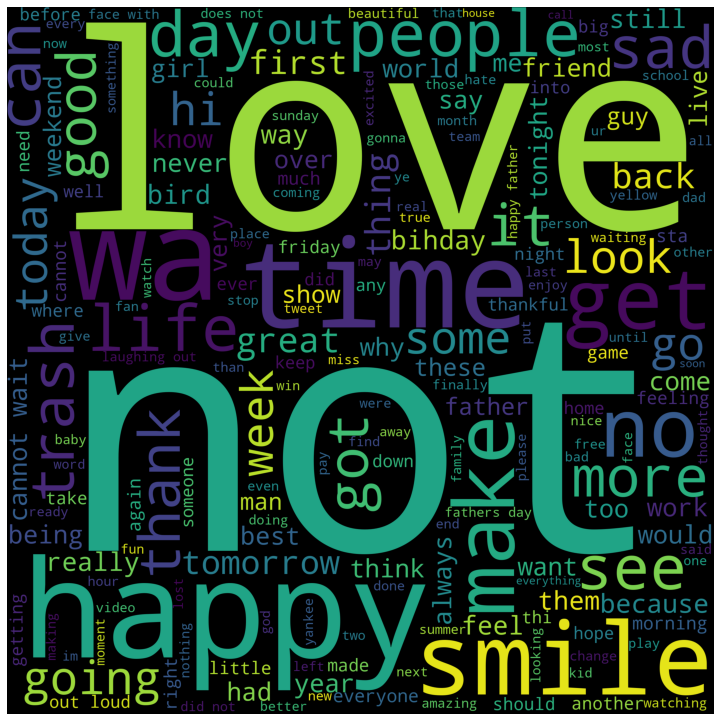

In [202]:
showWordCloud(train[train["class"] == 0].tweet)

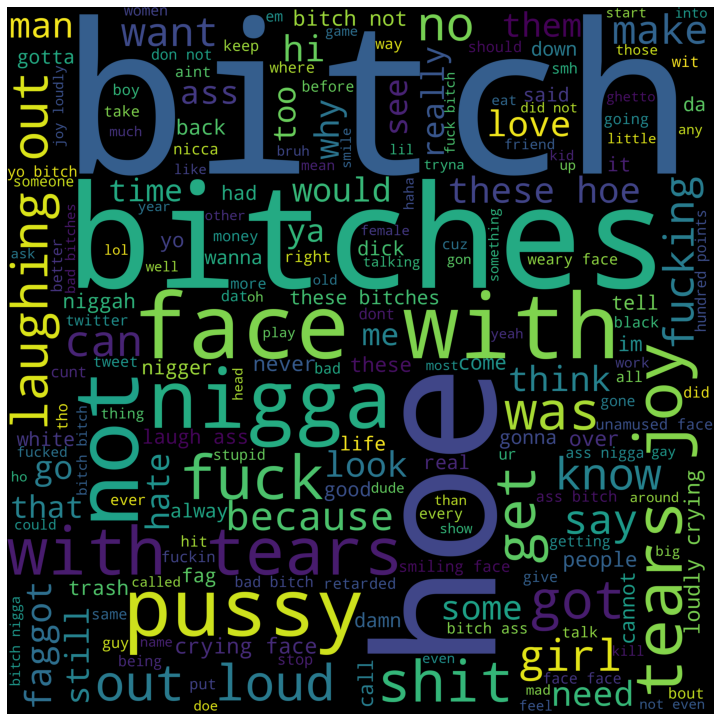

In [203]:
showWordCloud(train[train["class"] == 1].tweet)

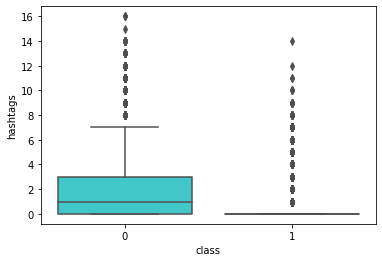

In [204]:
sns.boxplot(x='class',y='hashtags',data=train,palette='rainbow')

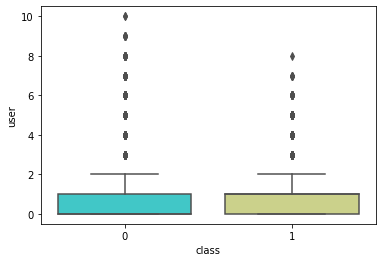

In [205]:
sns.boxplot(x='class',y='user',data=train,palette='rainbow')

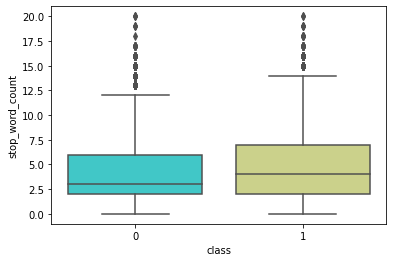

In [206]:
sns.boxplot(x='class',y='stop_word_count',data=train,palette='rainbow')

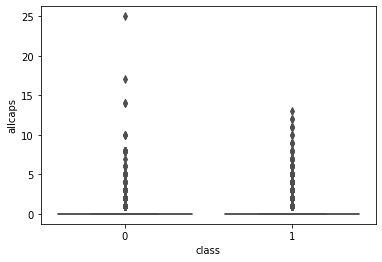

In [207]:
sns.boxplot(x='class',y='allcaps',data=train,palette='rainbow')

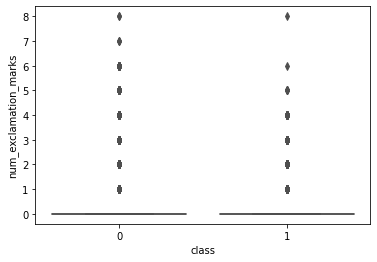

In [208]:
sns.boxplot(x='class',y='num_exclamation_marks',data=train,palette='rainbow')

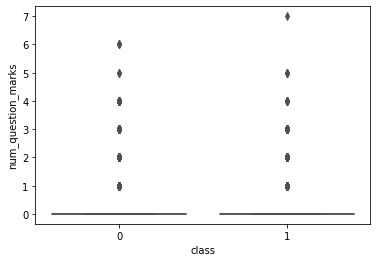

In [209]:
sns.boxplot(x='class',y='num_question_marks',data=train,palette='rainbow')


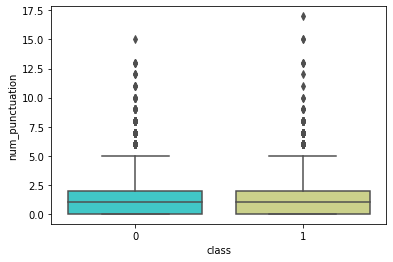

In [210]:
sns.boxplot(x='class',y='num_punctuation',data=train,palette='rainbow')

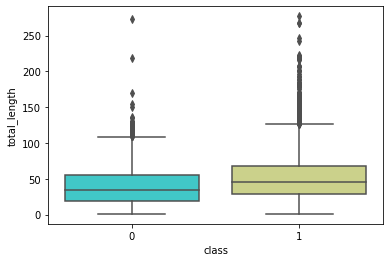

In [211]:
sns.boxplot(x='class',y='total_length',data=train,palette='rainbow')

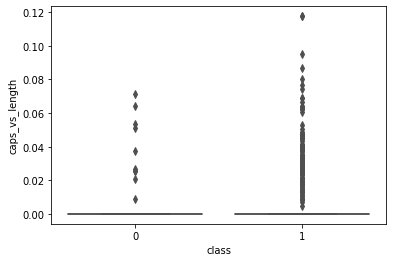

In [212]:
sns.boxplot(x='class',y='caps_vs_length',data=train,palette='rainbow')

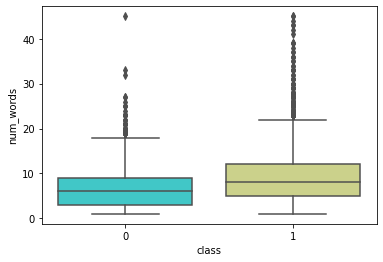

In [213]:

sns.boxplot(x='class',y='num_words',data=train,palette='rainbow')

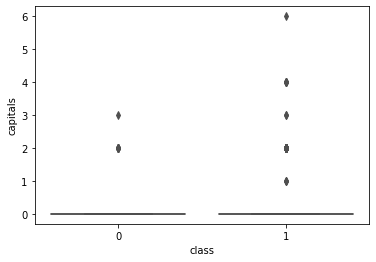

In [214]:
sns.boxplot(x='class',y='capitals',data=train,palette='rainbow')

In [215]:
len(train[train.num_words>2].tweet)

37001

In [216]:
len(train[train.num_words==1])

1662

In [217]:
train.total_length.max()

277

In [218]:
train[train.total_length==2].tweet

1498     pa
5108     no
6157     go
7902     up
10027    go
10242    it
11395    pm
11651    of
13001    np
15221    st
15432    go
16352    no
22303    oh
27394    ok
27697    ad
28358    go
30366    xx
31949    in
32254    me
32634    it
34270    go
34533    pa
34577    xx
35766    to
36792    ok
37024    me
37286    mm
38048    xo
40125    go
40869    go
41320    do
41553    be
Name: tweet, dtype: object

In [190]:
vec = TfidfVectorizer(ngram_range=(3,3),max_features=10000,stop_words=["has","face","he","by","one","they"])
train_tfidf0 = vec.fit_transform(train[train["class"]==1].tweet)

In [152]:
%run ../src/processing/glove_utils.py

In [191]:
word,frequency = get_top_n_words(100,vec,train_tfidf0)


In [149]:
def horizontal_bar_chart(w,f,color):
    trace = go.Bar(
        y= w[::-1],
        x= f[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [189]:
trace0 = horizontal_bar_chart(word,frequency, 'green')

In [182]:
trace1 = horizontal_bar_chart(word,frequency, 'blue')

In [155]:
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

# bigram

In [173]:
#combination 1,2
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [162]:
#only 2
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


# trigrams

In [186]:
#combination 1,2,3
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


In [192]:
#only 3
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')
